# Final Visualization Report - 60%

## Student ID - 23020991
## Name : Vishal Ramdayal Garg

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [31]:
# Load the dataset
olympics_data = pd.read_csv("dataset_olympics.csv")

In [32]:
# Function to create a table showing medal counts by team
def medal_count_table(data):
    medal_counts = data.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
    medal_counts['Total'] = medal_counts.sum(axis=1)
    medal_counts.sort_values(by='Total', ascending=False, inplace=True)
    return medal_counts

In [33]:
# Create medal count table
medal_counts_table = medal_count_table(olympics_data)

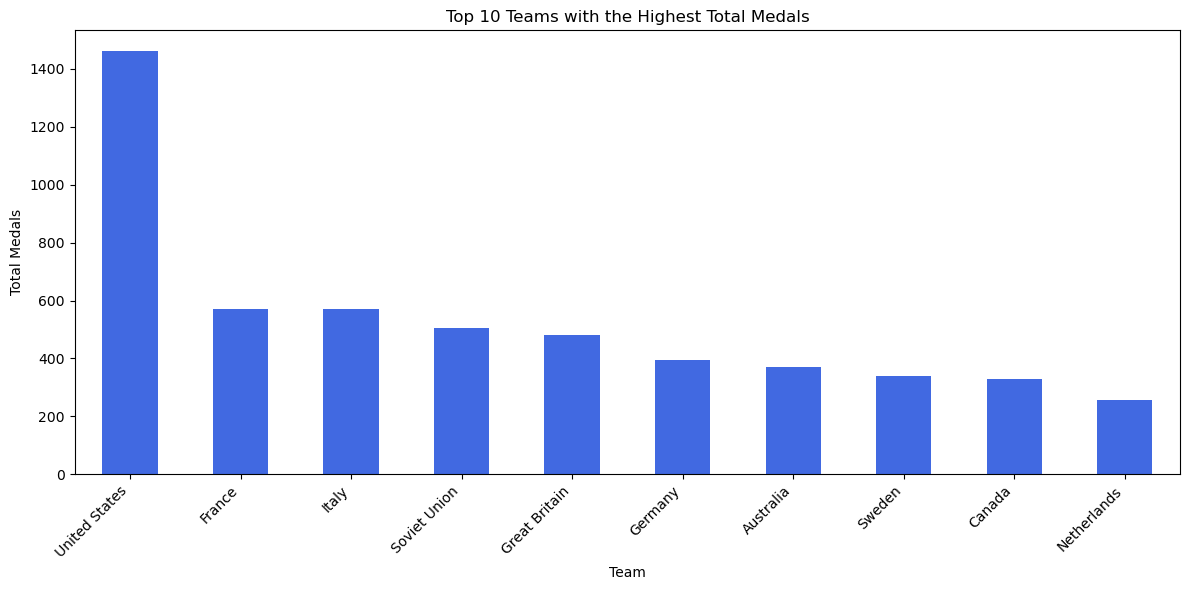

In [34]:
# Plot 1: Bar plot showing top 10 teams with the highest total medals
plt.figure(figsize=(12, 6))
top_10_teams = medal_counts_table.head(10)
top_10_teams['Total'].plot(kind='bar', color='royalblue')
plt.title('Top 10 Teams with the Highest Total Medals')
plt.xlabel('Team')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

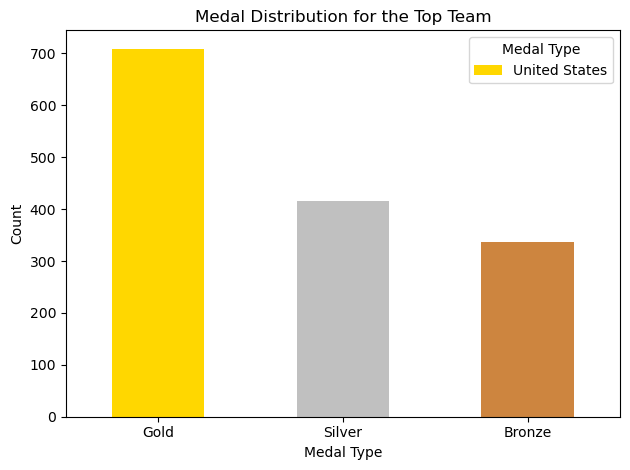

In [35]:
# Plot 2: Stacked bar plot showing medal distribution (Gold, Silver, Bronze) for the top team
top_team_medals = medal_counts_table.iloc[0][['Gold', 'Silver', 'Bronze']]
top_team_medals.plot(kind='bar', stacked=True, color=['gold', 'silver', 'peru'])
plt.title('Medal Distribution for the Top Team')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

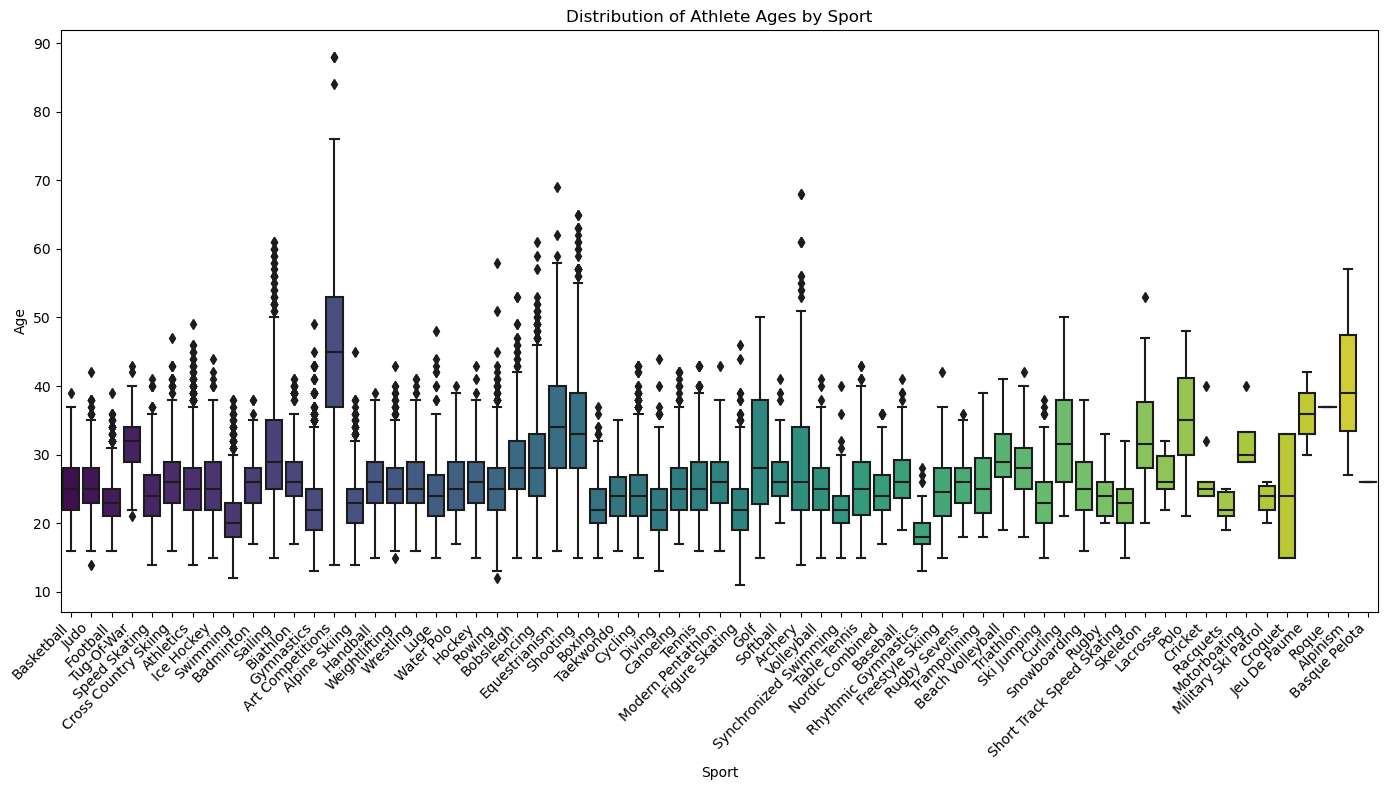

In [36]:
# Plot: Box plot showing the distribution of athlete ages by sport
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sport', y='Age', data=olympics_data, palette='viridis')
plt.title('Distribution of Athlete Ages by Sport')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
# Plot 4: Pie chart showing gender distribution (using Plotly)
gender_distribution = olympics_data['Sex'].value_counts()
fig = go.Figure(data=[go.Pie(labels=gender_distribution.index, values=gender_distribution, hole=0.3)])
fig.update_layout(title_text='Gender Distribution of Athletes', font=dict(size=18))
fig.show()

In [38]:
# Display the medal count table
print("Medal Count Table:")
print(medal_counts_table.head(10))

Medal Count Table:
Medal          Bronze   Gold  Silver   Total
Team                                        
United States   336.0  709.0   415.0  1460.0
France          221.0  167.0   183.0   571.0
Italy           186.0  202.0   183.0   571.0
Soviet Union    147.0  212.0   145.0   504.0
Great Britain   163.0  154.0   164.0   481.0
Germany         128.0  133.0   135.0   396.0
Australia       149.0   97.0   124.0   370.0
Sweden          140.0   79.0   122.0   341.0
Canada          114.0  107.0   107.0   328.0
Netherlands     109.0   58.0    90.0   257.0


In [39]:
pip install pycountry


Note: you may need to restart the kernel to use updated packages.


In [40]:
import pycountry

# Function to get ISO country code
def get_country_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return None

# Apply the function to your DataFrame to get the ISO codes
team_height_data['ISO_Code'] = team_height_data['Country'].apply(get_country_code)


In [41]:
import plotly.graph_objects as go

# Plotting the map plot
fig = go.Figure(data=go.Choropleth(
    locations=team_height_data['ISO_Code'],  # ISO country codes
    z=team_height_data['Height'],  # Height values
    text=team_height_data['Country'],  # Hover text
    colorscale='Viridis',  # Color scale
    autocolorscale=False,
    marker_line_color='white',  # Line markers between states
    colorbar_title='Mean Height (cm)'
))

fig.update_layout(
    title='Mean Height of Athletes by Country',
    geo=dict(
        showframe=False,  # Hide frame
        showcoastlines=False,  # Hide coastlines
        projection_type='equirectangular'  # Projection type
    )
)

fig.show()
